In [59]:
import pandas as pd
import numpy as np
import glob
import pyarrow.feather as feather
import seaborn as sns
import re

In [15]:
parent_path = 'C:\\Users\\Prabhanjan Kulkarni\\Desktop\\IS 733\\EdNet-KT4\\KT4\\'
fnames=glob.glob(parent_path+"/*.csv")
user_list=[]
for filename in fnames:
    df=pd.read_csv(filename)
    filename=filename.replace(parent_path+"\\",'')
    filename=filename.replace('.csv','')
    df['user_id']=filename
    user_list.append(df)
    

userRef_df= pd.concat(user_list,axis=0)





In [ ]:
lectures_df=pd.read_csv("C:\\Users\\Prabhanjan Kulkarni\\Desktop\\IS 733\\contents\\lectures.csv")


In [72]:
userRef_df

,timestamp,action_type,item_id,cursor_time,source,user_answer,platform,user_id
0,1.570000e+12,enter,b3544,NaN,diagnosis,NaN,mobile,C:\Users\Prabhanjan Kulkarni\Desktop\IS 733\Ed...
1,1.570000e+12,respond,q5012,NaN,diagnosis,b,mobile,C:\Users\Prabhanjan Kulkarni\Desktop\IS 733\Ed...
2,1.570000e+12,submit,b3544,NaN,diagnosis,NaN,mobile,C:\Users\Prabhanjan Kulkarni\Desktop\IS 733\Ed...
3,1.570000e+12,enter,b3238,NaN,diagnosis,NaN,mobile,C:\Users\Prabhanjan Kulkarni\Desktop\IS 733\Ed...
4,1.570000e+12,respond,q4706,NaN,diagnosis,c,mobile,C:\Users\Prabhanjan Kulkarni\Desktop\IS 733\Ed...
...,...,...,...,...,...,...,...,...
487,1.568965e+12,enter,b3819,NaN,sprint,NaN,mobile,C:\Users\Prabhanjan Kulkarni\Desktop\IS 733\Ed...
488,1.568965e+12,respond,q5287,NaN,sprint,c,mobile,C:\Users\Prabhanjan Kulkarni\Desktop\IS 733\Ed...
489,1.568965e+12,submit,b3819,NaN,sprint,NaN,mobile,C:\Users\Prabhanjan Kulkarni\Desktop\IS 733\Ed...
490,1.568965e+12,enter,e3819,NaN,sprint,NaN,mobile,C:\Users\Prabhanjan Kulkarni\Desktop\IS 733\Ed...


In [69]:
user_insight=pd.DataFrame(columns=['User_id','LecturesWatched'])
user_insight['user_id']=userRef_df['user_id']



In [71]:
user_insight['LecturesWatched']=lectures_df['lecture_id'].map(userRef_df['item_id'].value_counts())

KeyError: 'lecture_id'

In [57]:

parent_pat = 'C:\\Users\\Prabhanjan Kulkarni\\Desktop\\IS 733\\EdNet-KT4\\KT4\\'
sample_df = userRef_df.head(1)
sample_df.replace(parent_path,'')

,timestamp,action_type,item_id,cursor_time,source,user_answer,platform,user_id
0,1.570000e+12,enter,b3544,NaN,diagnosis,NaN,mobile,C:\Users\Prabhanjan Kulkarni\Desktop\IS 733\Ed...


In [61]:
questions_file_path = "C:\\Users\\Prabhanjan Kulkarni\\Desktop\\IS 733\\contents\\questions.csv"
questions_df = pd.read_csv(questions_file_path)

questions_df.to_feather("quest.ftr")

del questions_df['bundle_id']
del questions_df['explanation_id']
del questions_df['part']
del questions_df['tags']
del questions_df['deployed_at']
user_file_path = "C:\\Users\\Prabhanjan Kulkarni\\Desktop\\IS 733\\contents\\output.csv"
user_df = pd.read_csv(user_file_path)

In [62]:
userfinal_df=pd.merge(user_df,questions_df,left_on='item_id',right_on='question_id')

userfinal_df["final"]=np.where(userfinal_df['user_answer']==userfinal_df['correct_answer'],True,False)

correct_count=userfinal_df.final[userfinal_df.final==True].count()

correct_count

(correct_count/userfinal_df.user_answer.count())*100




49.52626183153327

In [63]:
 userfinal_df

,user_id,item_id,user_answer,question_id,correct_answer,final
0,u1,q5012,b,q5012,c,False
1,u10076,q5012,d,q5012,c,False
2,u1014,q5012,b,q5012,c,False
3,u1014,q5012,c,q5012,c,True
4,u1014,q5012,c,q5012,c,True
...,...,...,...,...,...,...
1048570,u11929,q17661,d,q17661,d,True
1048571,u11929,q17664,d,q17664,d,True
1048572,u11929,q17664,d,q17664,d,True
1048573,u11929,q17663,d,q17663,a,False


In [41]:
 user_plot = userfinal_df[:10]

In [42]:
 user_plot

,user_id,item_id,user_answer,question_id,correct_answer,final
0,u1,q5012,b,q5012,c,False
1,u10076,q5012,d,q5012,c,False
2,u1014,q5012,b,q5012,c,False
3,u1014,q5012,c,q5012,c,True
4,u1014,q5012,c,q5012,c,True
5,u10319,q5012,a,q5012,c,False
6,u10319,q5012,c,q5012,c,True
7,u1043,q5012,a,q5012,c,False
8,u1043,q5012,c,q5012,c,True
9,u1109,q5012,b,q5012,c,False


In [43]:
 user_plot.to_csv("user_plot.csv")

In [44]:
user_plot_wide = user_plot.pivot("user_id", "user_answer", "correct_answer")
user_plot_wide.head()

ValueError: Index contains duplicate entries, cannot reshape

In [3]:
Df = pd.read_csv('C:\\Users\\Prabhanjan Kulkarni\\Desktop\\IS 733\\plot\\user_plot.csv')



In [47]:
questreq_df = pd.read_csv(questions_file_path)
del questreq_df['bundle_id']
del questreq_df['explanation_id']
del questreq_df['tags']
del questreq_df['deployed_at']

#del questreq_df['correct_answer']

questreq_df.info()

questreq_df['Type']=""

questreq_df.loc[questreq_df['part']==1,'Type']="Describe Picture"
questreq_df.loc[questreq_df['part']==2,'Type']="Respond to Statement"
questreq_df.loc[questreq_df['part']==3,'Type']="Conversation"
questreq_df.loc[questreq_df['part']==4,'Type']="Long Message"
questreq_df.loc[questreq_df['part']==5,'Type']="Feeling blank sentence"
questreq_df.loc[questreq_df['part']==6,'Type']="Letter"
questreq_df.loc[questreq_df['part']==7,'Type']="Long Message"
#user_req=pd.read_csv(user_file_path)


print(questreq_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13169 non-null  object
 1   correct_answer  13169 non-null  object
 2   part            13169 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 308.8+ KB
      question_id correct_answer  part                  Type
0              q1              b     1      Describe Picture
1              q2              a     1      Describe Picture
2              q3              b     1      Describe Picture
3              q4              b     1      Describe Picture
4              q5              c     1      Describe Picture
...           ...            ...   ...                   ...
13164      q18139              b     2  Respond to Statement
13165      q18140              a     2  Respond to Statement
13166      q18141              a     2  Respond to Statement
13167     

In [48]:
questreq_df['User_Attempts']=""


questreq_df['User_Attempts']=questreq_df['question_id'].map(userRef_df['item_id'].value_counts())


In [49]:
print(questreq_df)

      question_id correct_answer  part                  Type  User_Attempts
0              q1              b     1      Describe Picture         3260.0
1              q2              a     1      Describe Picture         3034.0
2              q3              b     1      Describe Picture        27728.0
3              q4              b     1      Describe Picture        11345.0
4              q5              c     1      Describe Picture         7832.0
...           ...            ...   ...                   ...            ...
13164      q18139              b     2  Respond to Statement          284.0
13165      q18140              a     2  Respond to Statement          238.0
13166      q18141              a     2  Respond to Statement          295.0
13167      q18142              a     2  Respond to Statement          285.0
13168      q18143              c     2  Respond to Statement          288.0

[13169 rows x 5 columns]


user_id              u1
item_id           q5012
user_answer           b
question_id       q5012
correct_answer        c
final             False
Name: 0, dtype: object

In [50]:
question_file_path = "C:\\Users\\Prabhanjan Kulkarni\\Desktop\\IS 733\\contents\\questions.csv"
quest_df = pd.read_csv(question_file_path)

del quest_df['bundle_id']
del quest_df['explanation_id']
del quest_df['part']
del quest_df['tags']
del quest_df['deployed_at']

quest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13169 non-null  object
 1   correct_answer  13169 non-null  object
dtypes: object(2)
memory usage: 205.9+ KB


In [51]:
#userfinal_df.info()

count_series= userfinal_df[userfinal_df['final']==True]

#count_series


result = pd.DataFrame({'Total_Correct_answers':count_series.groupby(['question_id','final']).size()}).reset_index()


del result['final']

result.rename(columns={'question_id':'Quest_ID'})

result




,question_id,Total_Correct_answers
0,q1,33
1,q10,160
2,q100,79
3,q1000,166
4,q10000,37
...,...,...
11542,q9995,28
11543,q9996,28
11544,q9997,24
11545,q9998,32


In [52]:
question_profile = pd.merge(questreq_df,result,how='inner')



question_profile.to_csv('Question_Profile.csv',index=False)



In [13]:
question_profile=pd.read_csv('Question_Profile.csv')

question_profile['Accuracy']=question_profile['Total_Correct_answers'].astype(float)/question_profile['User_Attempts'].astype(float)

question_profile 

question_profile.to_csv('Question_Profile.csv')

In [14]:
question_profile 

,question_id,correct_answer,part,Type,User_Attempts,Total_Correct_answers,Accuracy
0,q1,b,1,Describe Picture,3260.0,33,0.010123
1,q2,a,1,Describe Picture,3034.0,40,0.013184
2,q3,b,1,Describe Picture,27728.0,199,0.007177
3,q4,b,1,Describe Picture,11345.0,128,0.011283
4,q5,c,1,Describe Picture,7832.0,103,0.013151
...,...,...,...,...,...,...,...
11542,q18139,b,2,Respond to Statement,284.0,9,0.031690
11543,q18140,a,2,Respond to Statement,238.0,12,0.050420
11544,q18141,a,2,Respond to Statement,295.0,8,0.027119
11545,q18142,a,2,Respond to Statement,285.0,12,0.042105


In [4]:
Df = pd.read_csv('C:\\Users\\Prabhanjan Kulkarni\\Desktop\\IS 733\\homework 1\\Question_Profile.csv')



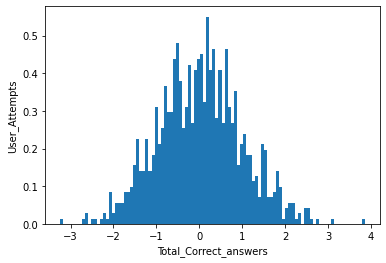

In [65]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Df = pd.read_csv('C:\\Users\\Prabhanjan Kulkarni\\Desktop\\IS 733\\homework 1\\Question_Profile.csv')
np.random.seed(42)
x = np.random.normal(size=1000)

plt.hist(x, density=True, bins=100)  # density=False would make counts
plt.ylabel('User_Attempts')
plt.xlabel('Total_Correct_answers');

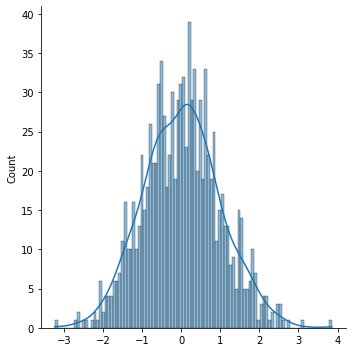

In [66]:
sns.displot(x, bins=100, kde=True);

Question with leastAccuracy or Toughest Question

In [12]:
Df.loc[Df['Accuracy']==Df['Accuracy'].min()]

,Unnamed: 0,question_id,correct_answer,part,Type,User_Attempts,Total_Correct_answers,Accuracy
4276,4276,q4815,a,5,Feeling blank sentence,2645.0,6,0.002268


Favourite Question or Question with most attempts

In [13]:
Df.loc[Df['User_Attempts']==Df['User_Attempts'].max()]

,Unnamed: 0,question_id,correct_answer,part,Type,User_Attempts,Total_Correct_answers,Accuracy
9964,9964,q11263,b,2,Respond to Statement,43966.0,531,0.012078
